## What is credit risk analysis?
#### The technique of evaluating a borrower's or counterparty's creditworthiness in order to determine the possibility that that party will fail to fulfil their financial obligations is known as credit risk analysis. It specifically looks into a variety of parameters, such as the borrower's credit history, income, and financial stability as well as the market and economic circumstances that could influence their capacity to pay back the debt.

## Basic terms for credit risk analysis
#### Charged off: When a lender declares a loan as "charged off," it means that they do not expect to receive the full amount of the outstanding debt. The lender writes off the debt as a loss for accounting purposes, but the borrower is still responsible for paying the remaining balance.

#### Delinquent balance: A delinquent balance is an outstanding debt that has not been paid on time. It refers to the amount of money that a borrower owes but has not yet paid by the due date.

#### Defaulters: A defaulter is a borrower who has failed to repay a loan or meet their financial obligations as agreed upon in the loan agreement. When a borrower defaults, they may face legal action and damage to their credit score. Lenders often take steps to recover the money owed, such as sending the debt to a collections agency or suing the borrower.

## About Dataset
#### Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

#### These files contain complete loan data for all loans issued through the 2007-2011, including the current loan status (Current, Charged-off, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, and collections among others. The file is a matrix of about 39 thousand observations and 111 variables. A data dictionary is provided in a separate file.

#### Data set can be found on this link: https://drive.google.com/file/d/1UCvyEagBe7xYDP07QBg9pzYt1Ajjy_Sc/view?usp=share_link

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Data loading 

In [2]:
df_loan = pd.read_csv('E:/data set/loan.csv')

C:\Users\Arjun Patil\AppData\Local\Temp\ipykernel_6424\675021183.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv('E:/data set/loan.csv')


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning  

In [5]:
# Compulsory drop of ID type of Features
# 1) ID type features simply act as row identifiers when data get built into the database
# 2) ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome
df_loan=df_loan.drop(['id','member_id'],axis=1)

In [6]:
#pd.set_option('max_columns',None)
#df_loan.head()

In [7]:
df_loan.dtypes

loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
term                 object
int_rate            float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 72, dtype: object

In [8]:
# Creating a Frequency Table in Pandas for each categorical
# dataframe['categorical feature'].value_counts()  --- value_counts() function will show you which all values the categorical 
# feature will take and also how many observations are there for each of them

In [9]:
#Analyzing loan_status variable for getting a better understanding of the categories and the counts
df_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Define the Dependent Variable 

In [10]:

df_loan['target']=np.where(df_loan['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)


In [11]:
# Drop the loan_status variable
df_loan=df_loan.drop(['loan_status'],axis=1)

In [12]:
# Calculate the default rate or event rate in the data

### From below event rate we can say that without any model this data can give or predit 0.053 or 5.3% of people which are defaulters. 

In [13]:
#Classical Probability Definition gives us the rate of events
df_loan['target'].mean()

0.053221904056778443

In [14]:
df_loan.shape

(887379, 72)

In [15]:
# Missing Value Analysis

In [16]:
df_loan.isnull().mean()

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
total_rev_hi_lim    0.079195
inq_fi              0.975916
total_cu_tl         0.975916
inq_last_12m        0.975916
target              0.000000
Length: 72, dtype: float64

In [17]:
# Selecting all rows and only those columns where the missing value percentage is <=25%
data=df_loan.loc[:,df_loan.isnull().mean()<=0.25]

In [18]:
data.shape

(887379, 50)

#### 22 Features dropped Due to more than 25% Missing Values

In [19]:
# Creating a dataset with only dependent and independent
Y=data[['target']]
X=data.drop(['target'],axis=1)

### Handling missing values from remaining features

### For numerical data

In [20]:
char=X.select_dtypes(include='object')
num=X.select_dtypes(include='number')

In [21]:
# We have 30 numeric features
num.shape

(887379, 30)

In [22]:
num.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000005
dti                           0.000000
delinq_2yrs                   0.000033
inq_last_6mths                0.000033
open_acc                      0.000033
pub_rec                       0.000033
revol_bal                     0.000000
revol_util                    0.000566
total_acc                     0.000033
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000163
policy_code              

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [24]:
num_1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

### For chategorical data

In [25]:
# We have 19 Categorical features
char.shape

(887379, 19)

In [26]:
char_1=char.fillna(0)

In [27]:
char_1.isnull().mean()

term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
pymnt_plan             0.0
url                    0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

## Handling outliers

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1%,1800.000000,1800.000000,1600.000000,5.320000,60.650000,1.900000e+04,1.980000,0.000000,0.000000,3.000000,0.000000,3.090000e+02,2.200000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.657000e+03,3.000000e+03
5%,3600.000000,3600.000000,3500.000000,6.620000,120.420000,2.800000e+04,5.200000,0.000000,0.000000,5.000000,0.000000,2.031000e+03,13.900000,9.000000,0.000000,0.000000,343.825000,338.589000,225.348000,80.080000,0.000000,0.000000,0.000000,97.679000,0.000000,1.0,0.000000,0.000000e+00,9.173000e+03,6.000000e+03
10%,5000.000000,5000.000000,5000.000000,7.690000,166.050000,3.400000e+04,7.450000,0.000000,0.000000,6.000000,0.000000,3.418800e+03,22.300000,12.000000,0.000000,0.000000,690.150000,682.148000,440.260000,166.058000,0.000000,0.000000,0.000000,164.180000,0.000000,1.0,0.000000,0.000000e+00,1.456300e+04,8.400000e+03
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04


#### In this project outlier removal is not done to preserve the nature of the bussiness. EX. if you see total_rec_late_fee if we treat it as an outlier then technically we are correct but according to risk manegment perspective there might be 1% customers who paid as high as 358$ late fees. So it will not make sense to make customer look good artificially by capping the values.     

# Feature engineering

##  Feature engineering for Numerical features

#### Creating Deciles: Deciles are a way to divide a distribution of data into 10 equal parts, each representing 10% of the data. Deciles are a type of quantile, which are values that divide a distribution into equal parts.

#### KBinsDiscretizer is a class from the scikit-learn preprocessing module that is used to discretize continuous features into bins. In this case, the n_bins parameter is set to 10, which means that the data will be divided into 10 equally sized bins.

#### The encode parameter is set to 'ordinal', which means that the bin labels will be integers ranging from 0 to n_bins-1. The strategy parameter is set to 'quantile', which means that the bins will be formed based on the quantiles of the data.

#### The fit_transform() method is called on the numeric data num_1, which applies the binning to each column of the data. The resulting binned data is stored in a new DataFrame called num_binned, with each column name suffixed by '_Rank'.

#### Overall, this code is performing a simple binning of a numeric dataset into 10 bins using the quantile-based method, and returning the resulting binned data as a DataFrame.

In [29]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

E:\Softwares\Annaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Softwares\Annaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Softwares\Annaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Softwares\Annaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Softwares\Annaconda\lib\site-packages\sklearn\preprocessing\_discretization

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


In [30]:
num_binned

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,3.0,3.0,3.0,4.0,3.0,0.0,8.0,0.0,0.0,4.0,1.0,5.0,8.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0
887375,8.0,8.0,8.0,4.0,9.0,6.0,0.0,0.0,1.0,0.0,0.0,3.0,8.0,4.0,6.0,6.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,6.0,1.0
887376,5.0,5.0,5.0,7.0,3.0,1.0,9.0,0.0,0.0,4.0,1.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0
887377,4.0,4.0,4.0,9.0,3.0,4.0,8.0,1.0,2.0,8.0,0.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,5.0


#### This code is creating bar plots to visualize the relationship between each binned numerical feature and the target variable, by showing the mean value of the target variable for each bin of the feature. This can help in understanding the relationship between the features and the target, and identifying any patterns or trends.

C:\Users\Arjun Patil\AppData\Local\Temp\ipykernel_6424\2574356195.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


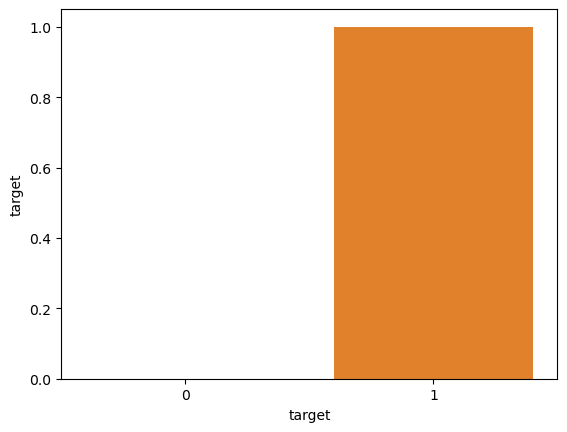

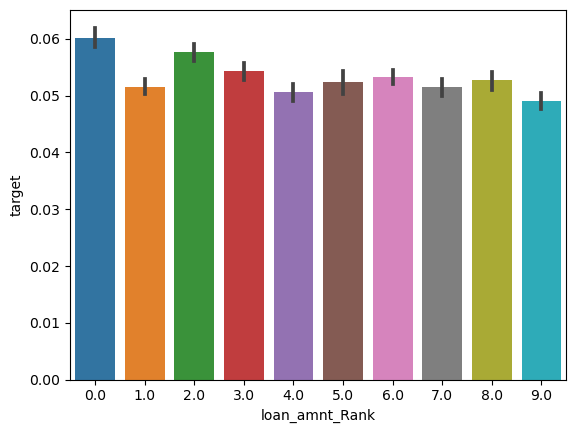

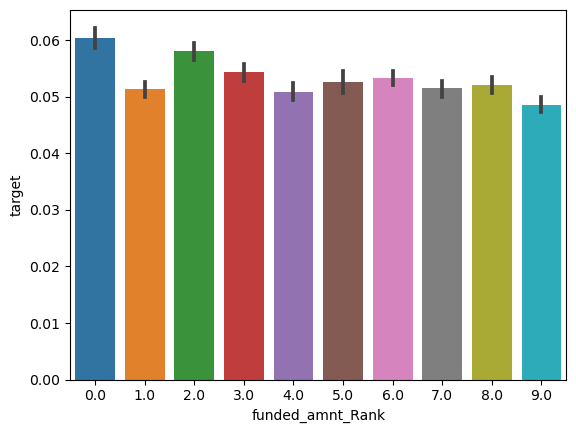

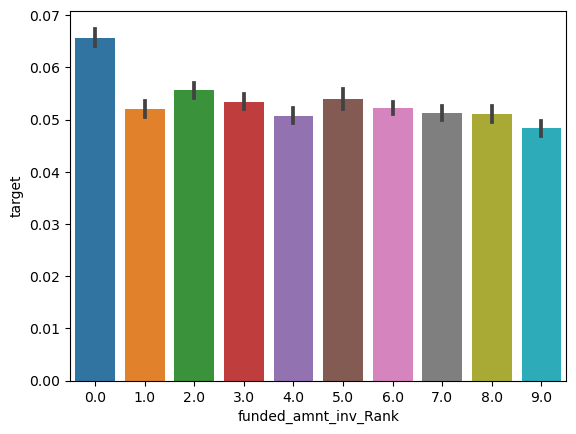

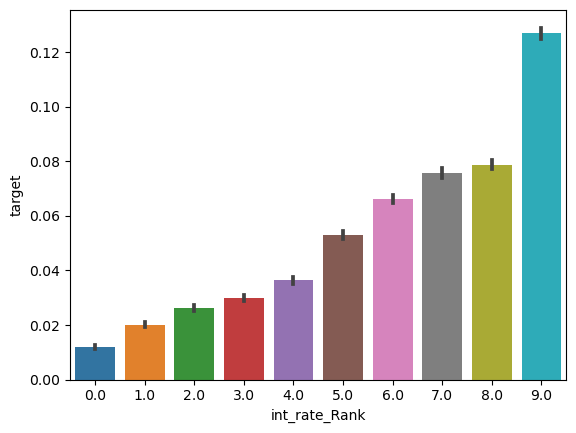

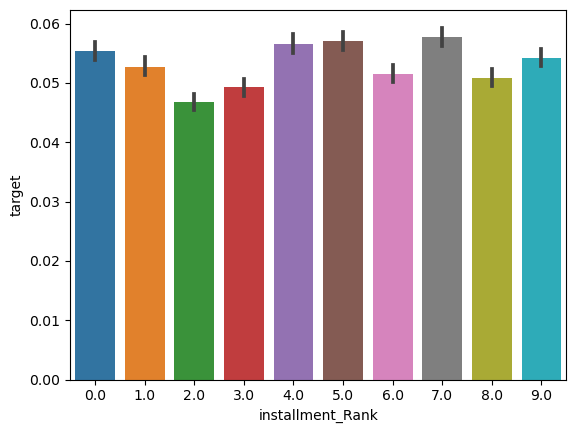

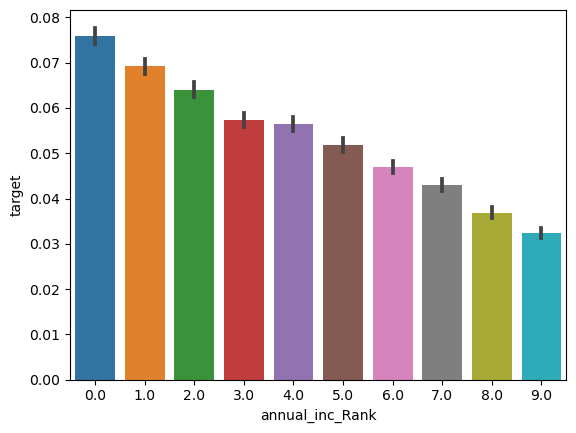

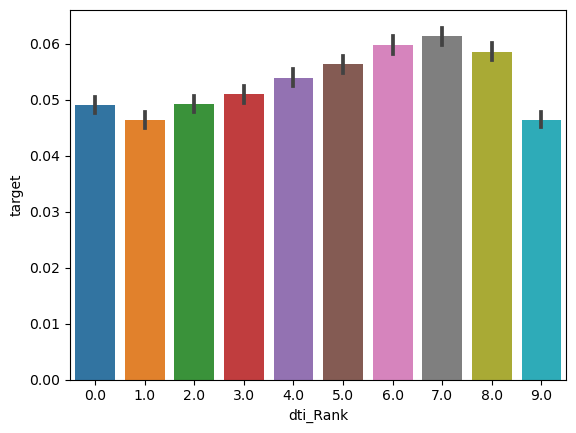

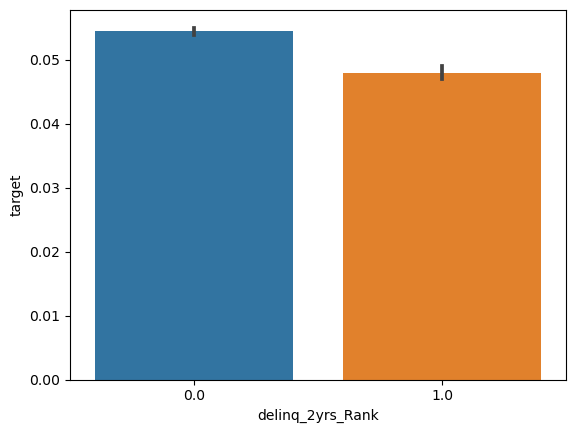

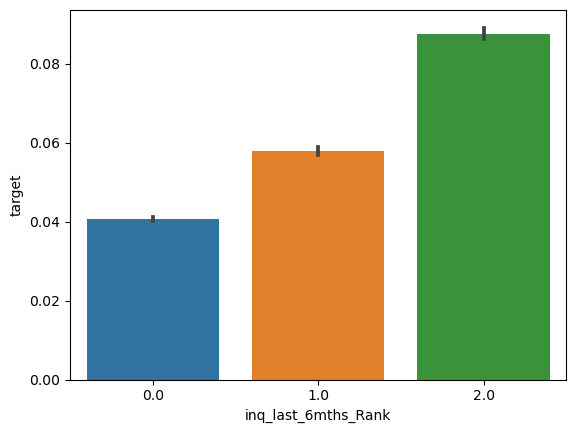

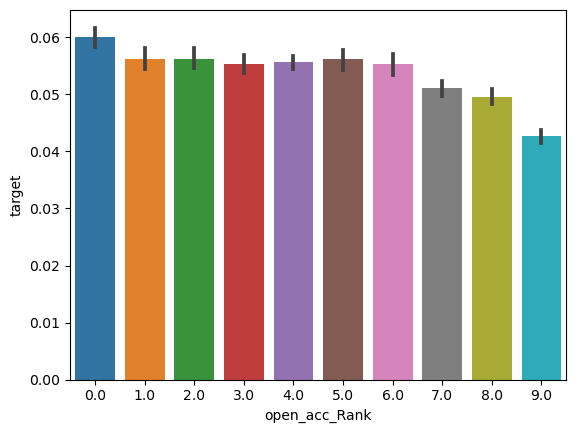

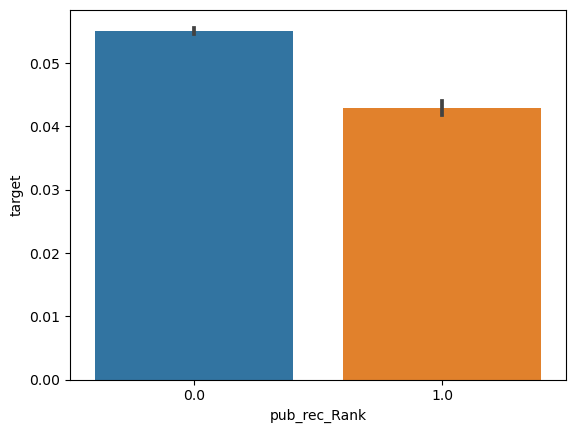

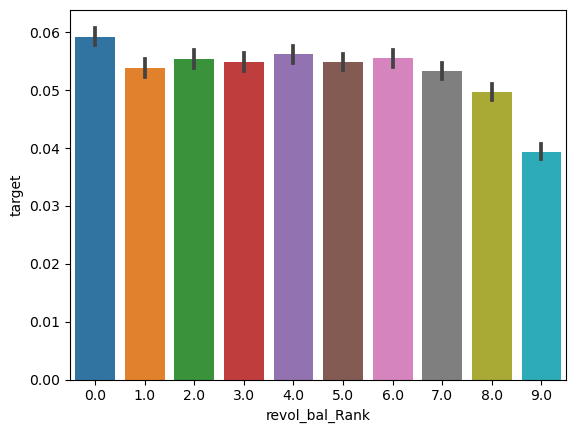

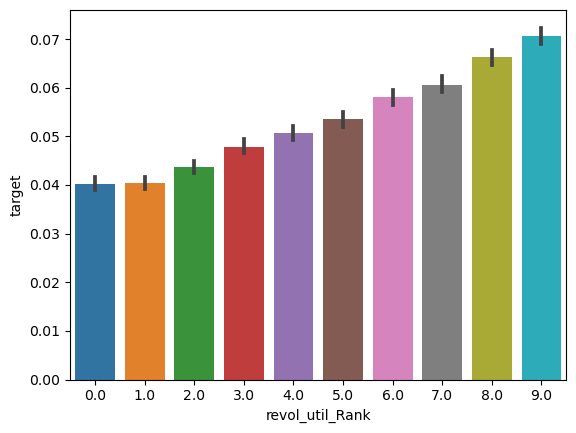

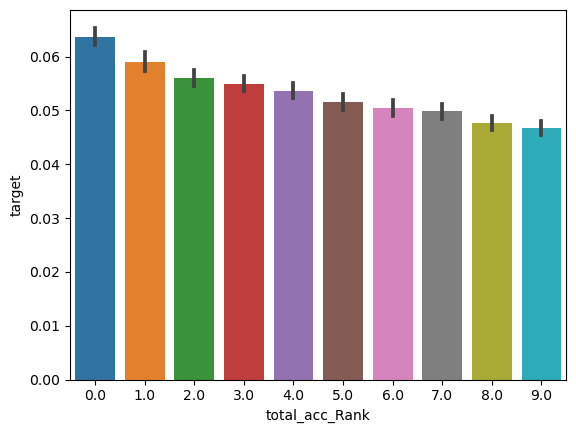

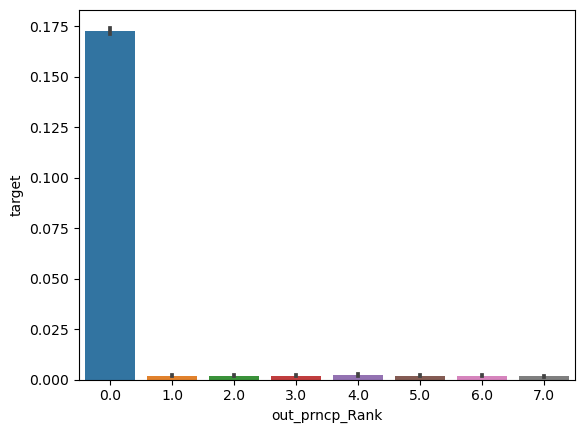

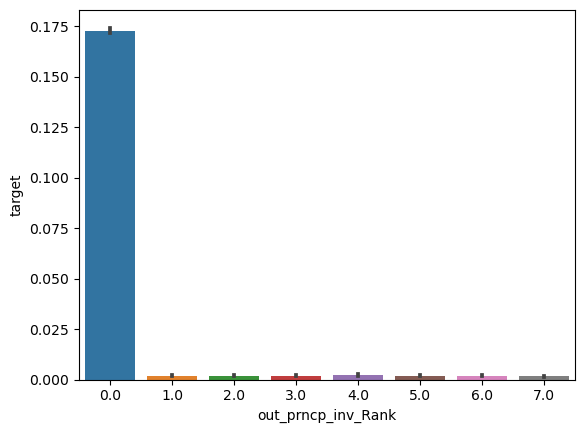

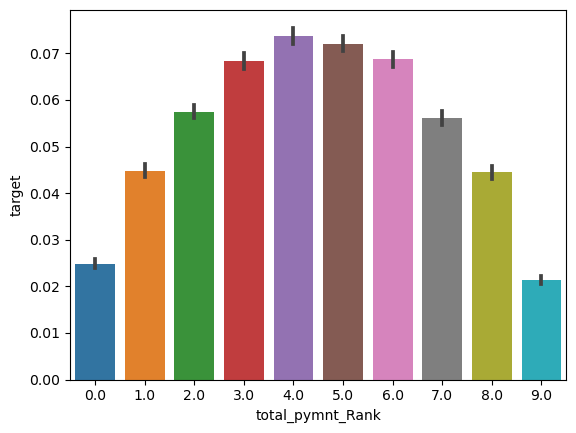

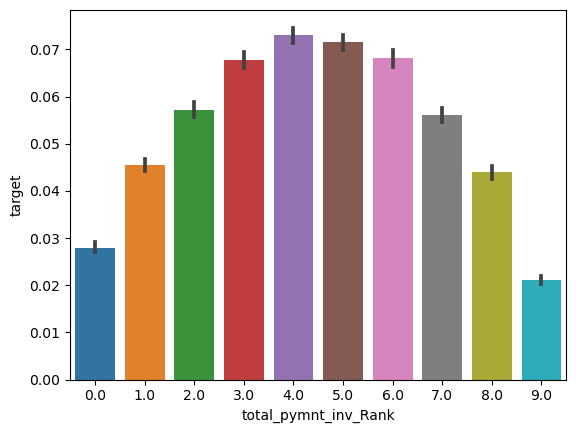

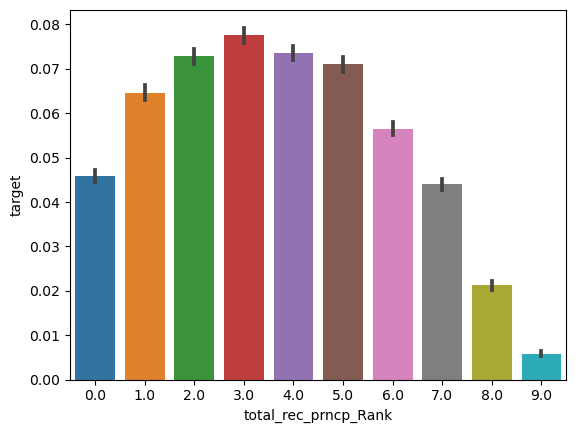

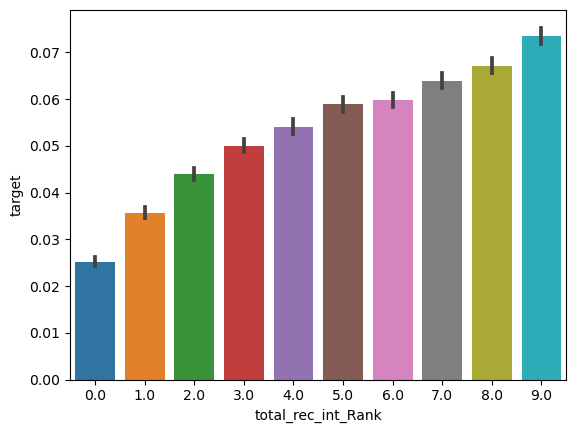

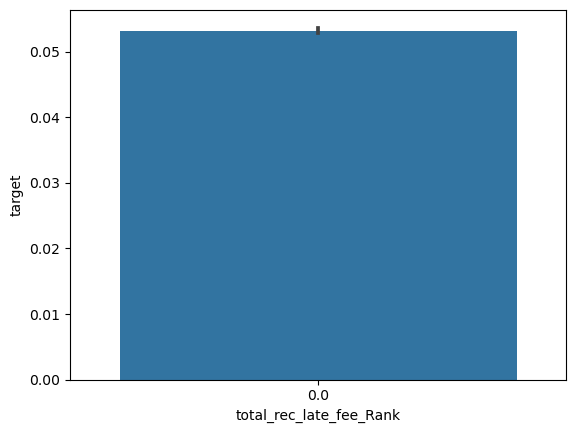

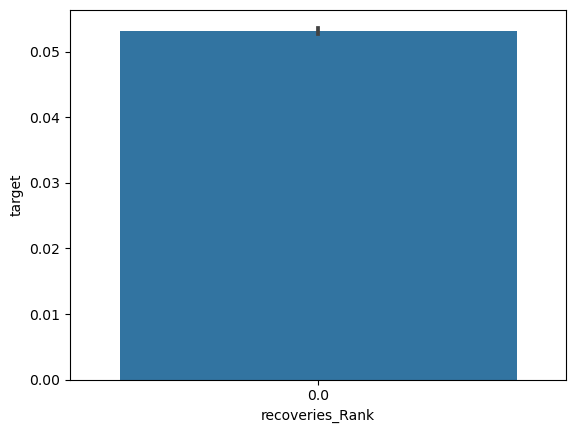

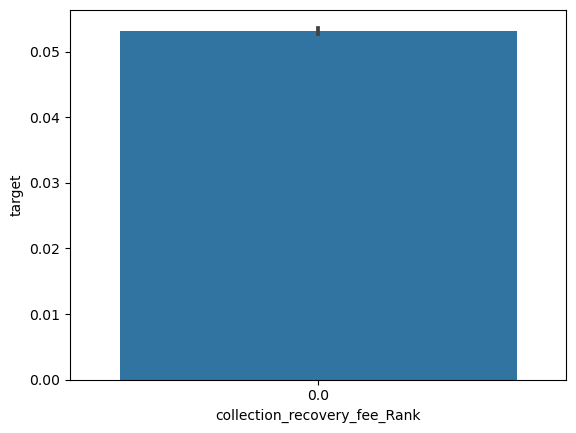

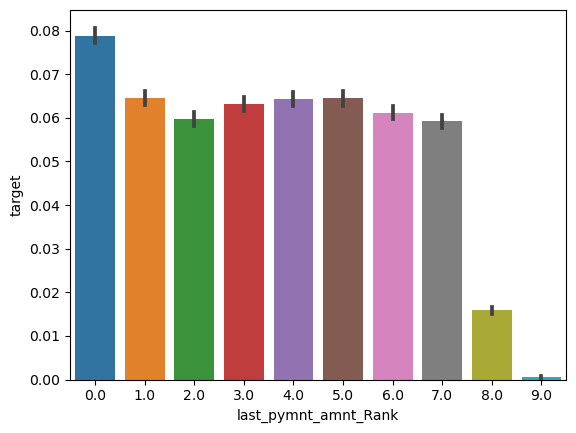

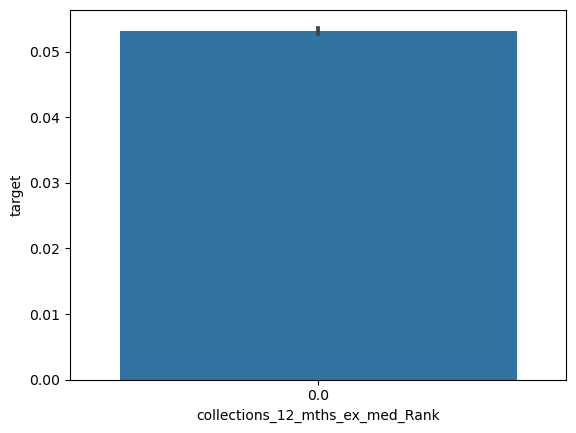

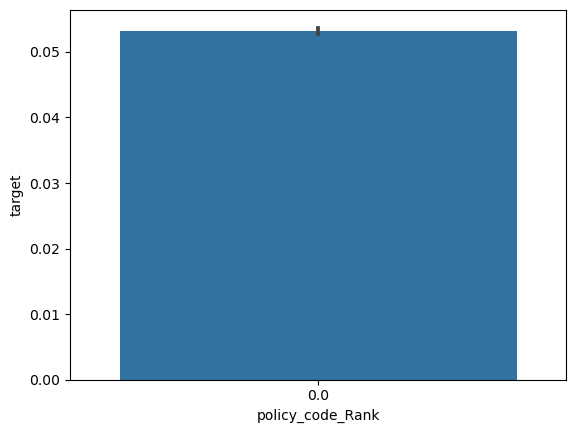

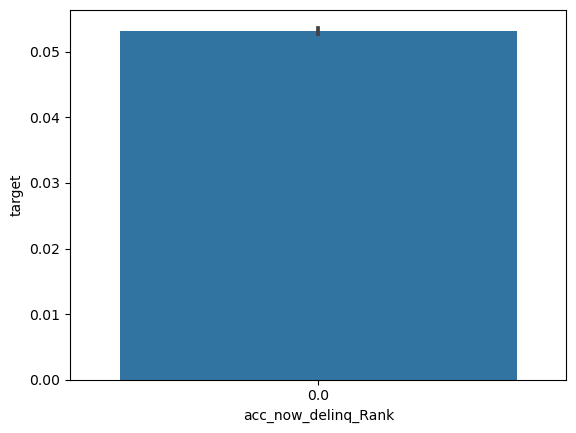

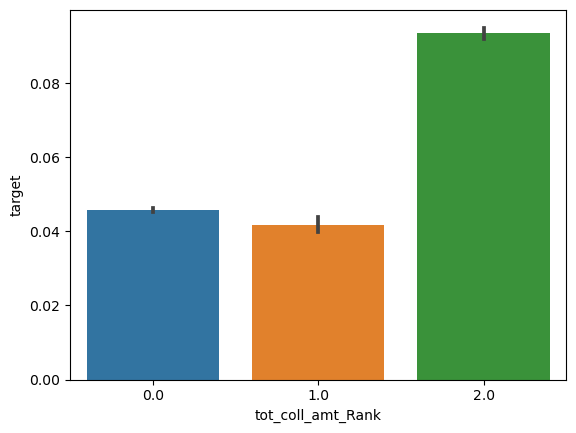

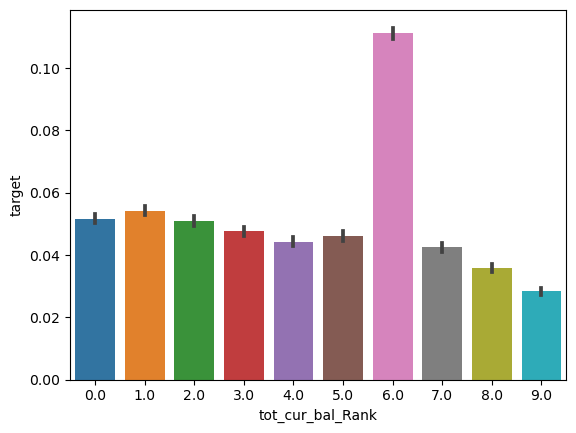

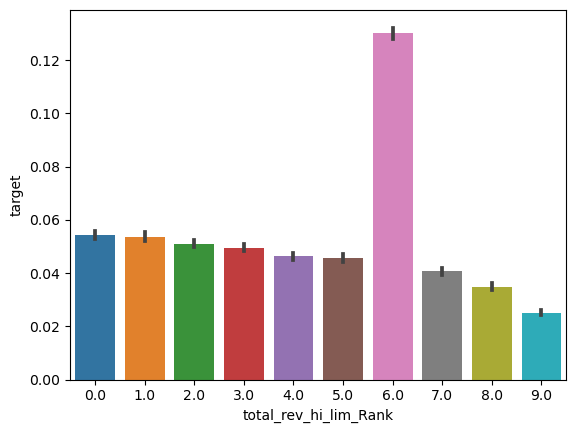

In [31]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

#### From above graphs we can see that most predictable numerical features are 'int_rate_rank','annual_income_rank','inq_last_6mths_rank','revol_util_rank,'total_acc_rank' because they show linearity.

In [32]:
best_num=X_bin_combined[['int_rate_Rank','annual_inc_Rank','inq_last_6mths_Rank','revol_util_Rank','total_acc_Rank']]

In [33]:
best_num_combined=pd.concat([Y,best_num],axis=1,join='inner')

#### Plotting best predictors 

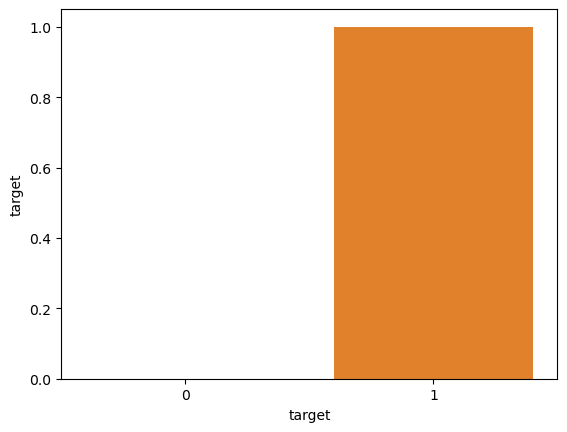

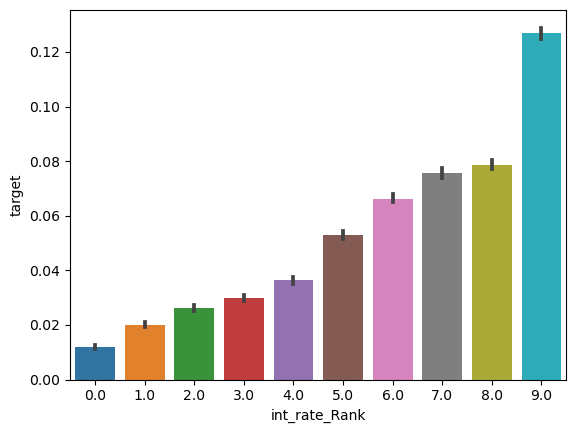

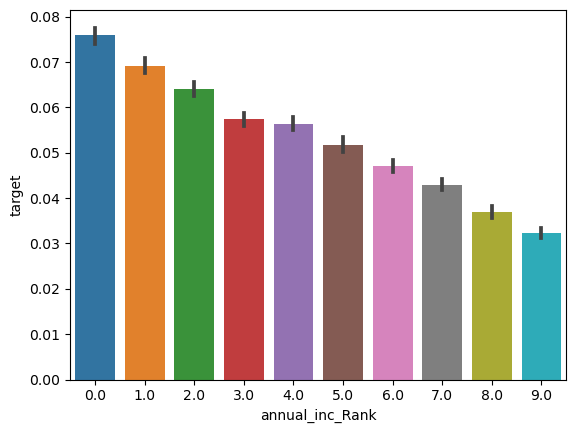

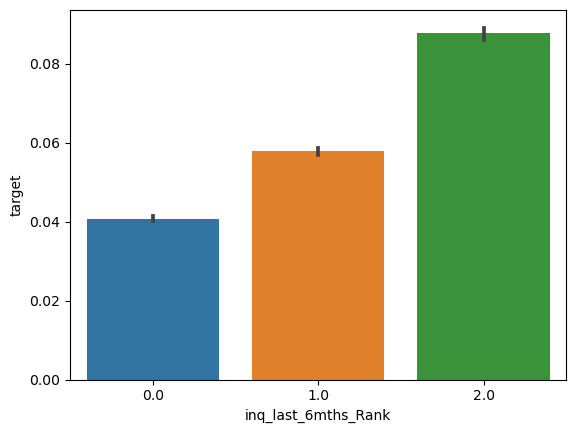

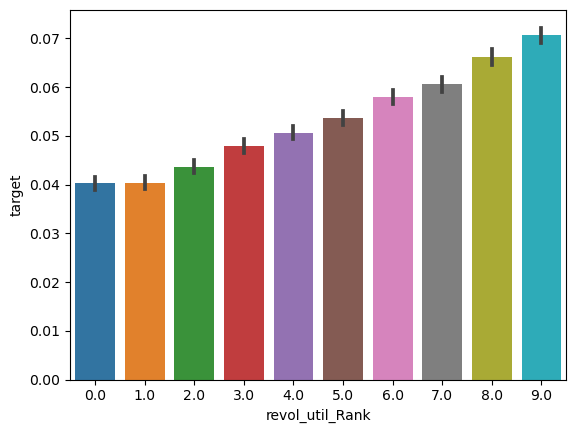

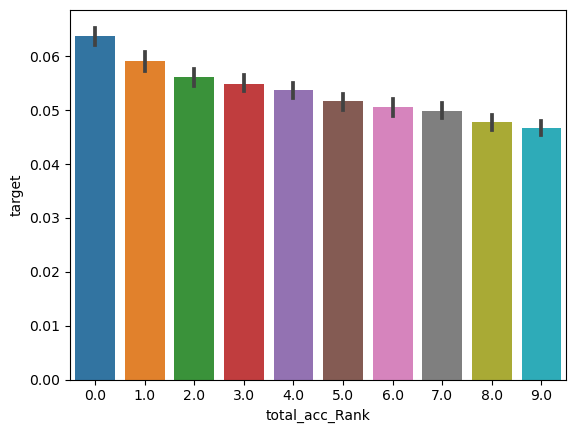

In [34]:
for new_col in (best_num_combined.columns):
    plt.figure()
    sns.barplot(x=new_col, y="target",data=best_num_combined, estimator=mean )
plt.show()

#### performing chi-squared feature selection on a numerical dataset to select the 15 best features based on their statistical significance in relation to the target variable Y, and creating a new DataFrame with only those selected features.

In [35]:
# Select K Best for Numerical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [36]:
select_features_df_num.loc[:0]

,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,4975.0,24000.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,171.62,225.70261,139458.189336,32068.620045


In [37]:
select_features_df_num.dtypes

funded_amnt_inv            float64
annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_coll_amt               float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

## Feature engineering for categorical features

In [38]:
char.shape

(887379, 19)

#### Replace the missing valus in Categorical using the Mode or the Most Frequent Strategy
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [39]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors
char_1=char_1.drop(['url','zip_code','emp_title','issue_d','addr_state','title','sub_grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d'],axis=1)

In [40]:
# 10 Categorical Features droppping based on Fair Lending Considerations

In [41]:
# Joining back the target  variable and exporting the pivot table for a BiVariate Analysis
#categorical_variable_chk=pd.concat([Y,char_1],axis=1,join='inner')
#categorical_variable_chk.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/categorical_data_chk.csv')

In [42]:
# Steps to regroup categorical features in order to achieve linear discrimination
# These levels to group have been discovered through the pivot analysis
char_1['purpose_1']=np.where(char_1['purpose'].isin(['other','medical','vacation','debt_consolidation','car','major_purchase','home_improvement','credit_card']),'others',char['purpose'])           
char_1['verified_1']=np.where(char_1['verification_status'].isin(['Source Verified','Verified']),'Verified',char_1['verification_status'])
char_1['home_own_1']=np.where(char_1['home_ownership'].isin(['OWN','MORTGAGE']),'OWN',
                     np.where(char_1['home_ownership'].isin(['RENT']),'RENT','OTHER'))
char_1['term_1']=np.where(char_1['term'].isin(['60 months']),'60','30')

In [43]:
char_2=char_1.loc[:,['purpose_1','verified_1','home_own_1','term_1','grade','emp_length','pymnt_plan','application_type']]

In [44]:
char_2.shape

(887379, 8)

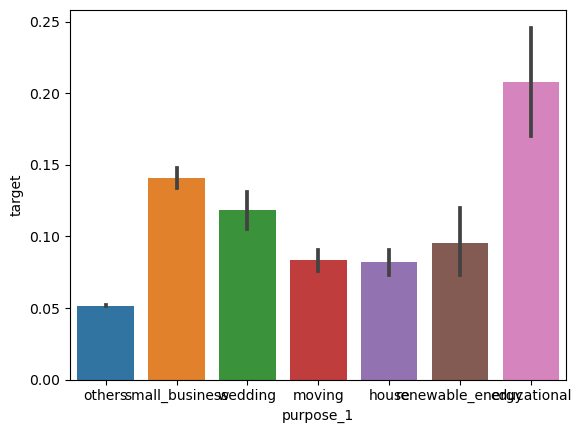

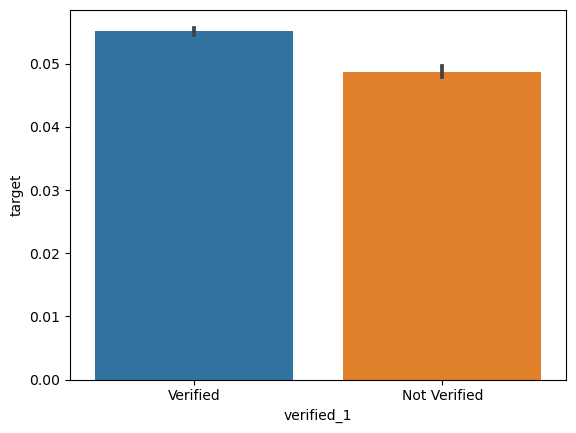

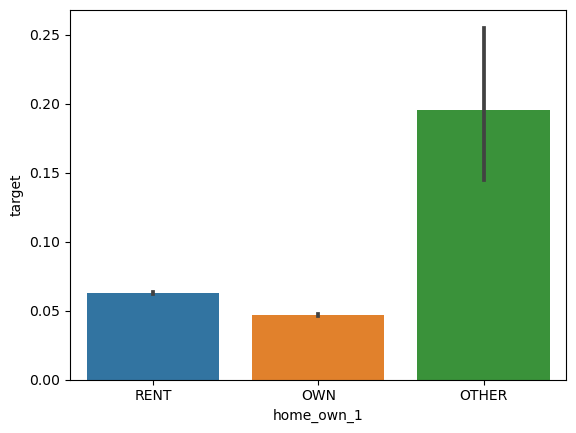

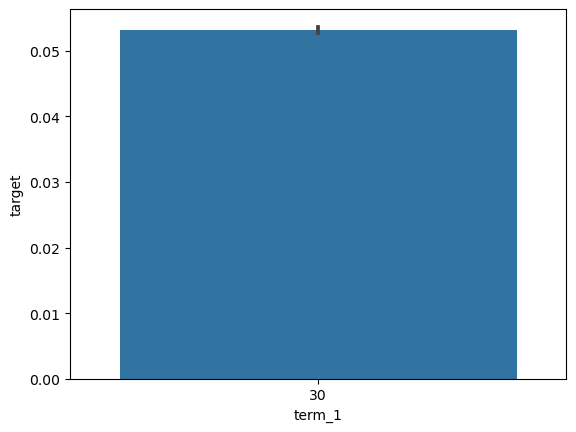

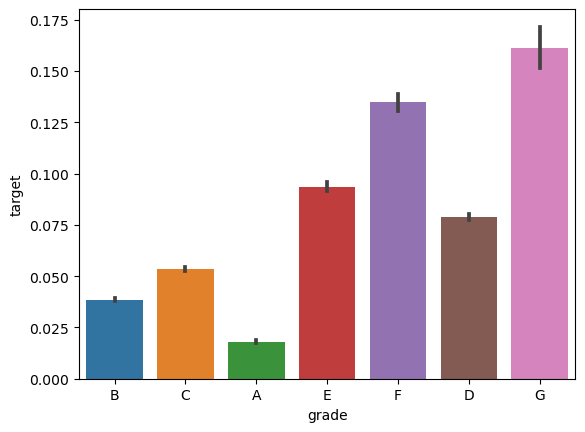

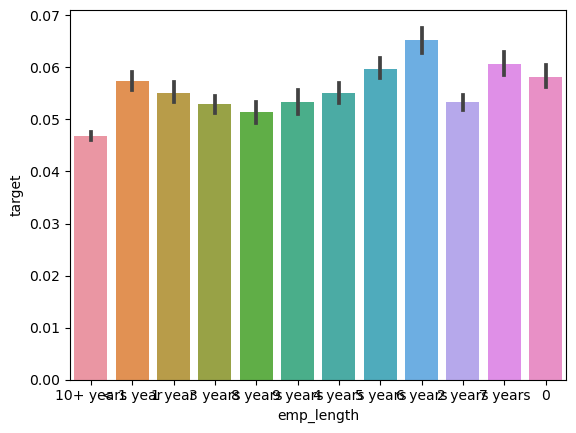

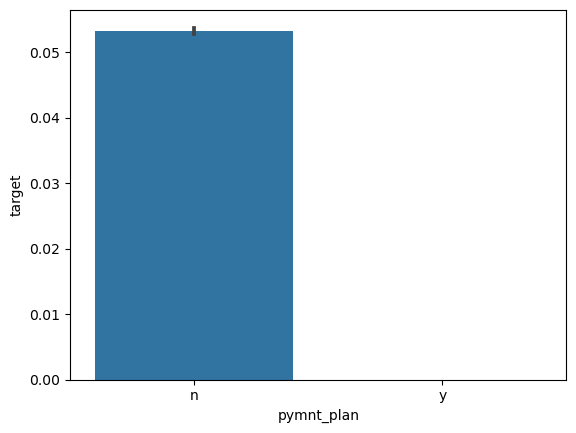

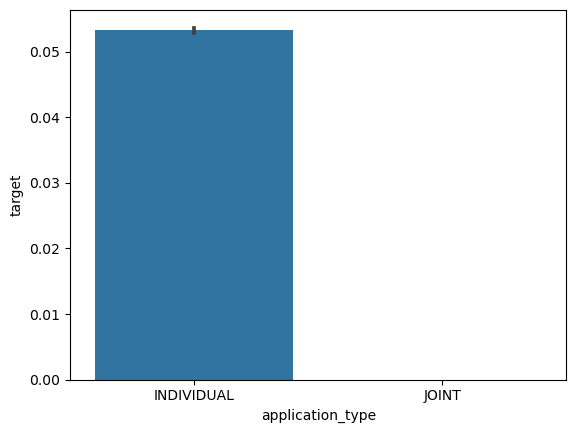

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char_2],axis=1,join='inner')

from numpy import mean
for col in (char_2.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [46]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_2, drop_first = True)

#### Selecting features using K Best

In [47]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=12)
X_new_1 = selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [48]:
select_features_df_char.loc[:0]

,purpose_1_moving,purpose_1_small_business,purpose_1_wedding,home_own_1_OWN,home_own_1_RENT,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_6 years
0,0,0,0,0,1,1,0,0,0,0,1,0


In [49]:
select_features_df_char.dtypes

purpose_1_moving            uint8
purpose_1_small_business    uint8
purpose_1_wedding           uint8
home_own_1_OWN              uint8
home_own_1_RENT             uint8
grade_B                     uint8
grade_D                     uint8
grade_E                     uint8
grade_F                     uint8
grade_G                     uint8
emp_length_10+ years        uint8
emp_length_6 years          uint8
dtype: object

#### As we saw in graphs 'int_rate','inq_last_6mths' could be good predictors but didn't picked in K best so adding those features to final numerical features list.

In [50]:
num_additional=num_1.loc[:,['int_rate','inq_last_6mths']]

In [51]:
num_additional.head()

,int_rate,inq_last_6mths
0,10.65,1.0
1,15.27,5.0
2,15.96,2.0
3,13.49,1.0
4,12.69,0.0


## Combing both final numrical data as well as categorical data

In [52]:
X_all=pd.concat([select_features_df_char,select_features_df_num,num_additional],axis=1,join="inner")

In [53]:
Y['target'].value_counts()

0    840151
1     47228
Name: target, dtype: int64

In [67]:
loan_new=pd.concat([X_all,Y['target']],axis=1,join="inner")

In [68]:
loan_new

,purpose_1_moving,purpose_1_small_business,purpose_1_wedding,home_own_1_OWN,home_own_1_RENT,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_6 years,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_rate,inq_last_6mths,target
0,0,0,0,0,1,1,0,0,0,0,1,0,4975.0,24000.0,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,225.70261,139458.189336,32068.620045,10.65,1.0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,2500.0,30000.0,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,225.70261,139458.189336,32068.620045,15.27,5.0,1
2,0,1,0,0,1,0,0,0,0,0,1,0,2400.0,12252.0,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,225.70261,139458.189336,32068.620045,15.96,2.0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,10000.0,49200.0,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,225.70261,139458.189336,32068.620045,13.49,1.0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,3000.0,80000.0,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,225.70261,139458.189336,32068.620045,12.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0,0,0,0,1,1,0,0,0,0,0,0,10000.0,31000.0,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,332.10,0.00000,25274.000000,17100.000000,11.99,0.0,0
887375,0,0,0,1,0,1,0,0,0,0,1,0,24000.0,79000.0,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,797.03,0.00000,140285.000000,10200.000000,11.99,1.0,0
887376,0,0,0,0,1,0,1,0,0,0,0,0,13000.0,35000.0,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,316.07,0.00000,34178.000000,18000.000000,15.99,0.0,0
887377,0,0,0,0,1,0,0,1,0,0,0,0,12000.0,64400.0,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,317.86,0.00000,58418.000000,27000.000000,19.99,2.0,0


In [70]:
loan_new

,purpose_1_moving,purpose_1_small_business,purpose_1_wedding,home_own_1_OWN,home_own_1_RENT,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_6 years,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_rate,inq_last_6mths,defaulter
0,0,0,0,0,1,1,0,0,0,0,1,0,4975.0,24000.0,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,225.70261,139458.189336,32068.620045,10.65,1.0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,2500.0,30000.0,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,225.70261,139458.189336,32068.620045,15.27,5.0,1
2,0,1,0,0,1,0,0,0,0,0,1,0,2400.0,12252.0,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,225.70261,139458.189336,32068.620045,15.96,2.0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,10000.0,49200.0,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,225.70261,139458.189336,32068.620045,13.49,1.0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,3000.0,80000.0,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,225.70261,139458.189336,32068.620045,12.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0,0,0,0,1,1,0,0,0,0,0,0,10000.0,31000.0,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,332.10,0.00000,25274.000000,17100.000000,11.99,0.0,0
887375,0,0,0,1,0,1,0,0,0,0,1,0,24000.0,79000.0,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,797.03,0.00000,140285.000000,10200.000000,11.99,1.0,0
887376,0,0,0,0,1,0,1,0,0,0,0,0,13000.0,35000.0,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,316.07,0.00000,34178.000000,18000.000000,15.99,0.0,0
887377,0,0,0,0,1,0,0,1,0,0,0,0,12000.0,64400.0,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,317.86,0.00000,58418.000000,27000.000000,19.99,2.0,0


In [55]:
column_names = X_all.columns
column_names

Index(['purpose_1_moving', 'purpose_1_small_business', 'purpose_1_wedding',
       'home_own_1_OWN', 'home_own_1_RENT', 'grade_B', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'emp_length_10+ years', 'emp_length_6 years',
       'funded_amnt_inv', 'annual_inc', 'revol_bal', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'int_rate', 'inq_last_6mths'],
      dtype='object')

In [56]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
    

In [81]:
new_columns=['purpose','grade', 'emp_length','funded_amnt_inv', 'annual_inc', 'revol_bal', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
'total_rec_int', 'recoveries', 'collection_recovery_fee',
'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','int_rate', 'inq_last_6mths']

In [86]:
loan_new=df_loan[new_columns]

In [92]:
loan_new=pd.concat([loan_new,Y['target']],axis=1,join="inner")

In [94]:
loan_new = loan_new.rename(columns={'target': 'defaulter'})

In [95]:
loan_new

,purpose,grade,emp_length,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_rate,inq_last_6mths,defaulter
0,credit_card,B,10+ years,4975.0,24000.0,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,NaN,NaN,NaN,10.65,1.0,0
1,car,C,< 1 year,2500.0,30000.0,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,NaN,NaN,NaN,15.27,5.0,1
2,small_business,C,10+ years,2400.0,12252.0,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,NaN,NaN,NaN,15.96,2.0,0
3,other,C,10+ years,10000.0,49200.0,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,NaN,NaN,NaN,13.49,1.0,0
4,other,B,1 year,3000.0,80000.0,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,NaN,NaN,NaN,12.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,debt_consolidation,B,8 years,10000.0,31000.0,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,332.10,0.0,25274.0,17100.0,11.99,0.0,0
887375,home_improvement,B,10+ years,24000.0,79000.0,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,797.03,0.0,140285.0,10200.0,11.99,1.0,0
887376,debt_consolidation,D,5 years,13000.0,35000.0,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,316.07,0.0,34178.0,18000.0,15.99,0.0,0
887377,debt_consolidation,E,1 year,12000.0,64400.0,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,317.86,0.0,58418.0,27000.0,19.99,2.0,0


In [96]:
cd E:\data set

E:\data set


In [97]:
loan_new.to_csv('new_loan4.csv')

# Split the data between Train and Testing datasets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [54]:
y_train.mean()

target    0.053195
dtype: float64

In [55]:
y_test.mean()

target    0.053284
dtype: float64

# Model Building

### Non Linearity in feature relationships are observed which makes tree methods a good choice.
### There are few options to consider among tree methods
### White Box (Completely Explainable Set of Rules) - Decision Tree
### Ensemble Methods - Random Forest (With Bagging)
### Ensemble Methods - GBM/XGBoost (Boosting)

# Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=20,rounded=True,feature_names=X_all.columns)
plt.show()

# Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

C:\Users\Arjun Patil\AppData\Local\Temp\ipykernel_10268\1340057770.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [58]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
recoveries,0.259464
collection_recovery_fee,0.131991
total_rec_prncp,0.114646
funded_amnt_inv,0.102544
out_prncp_inv,0.076091
out_prncp,0.073988
last_pymnt_amnt,0.070341
total_pymnt,0.043030
total_pymnt_inv,0.039460
total_rec_int,0.032925


# Gradient Boosting Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

E:\Softwares\Annaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

import pandas as pd
feature_importances=pd.DataFrame(clf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

# XGBoost Model

In [64]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

# Model Evaluation

In [65]:
y_pred=clf.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9964690061379191
Precision 0.9660778379900063
Recall 0.9677123722241805
f1_score 0.966894414312883


E:\Softwares\Annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


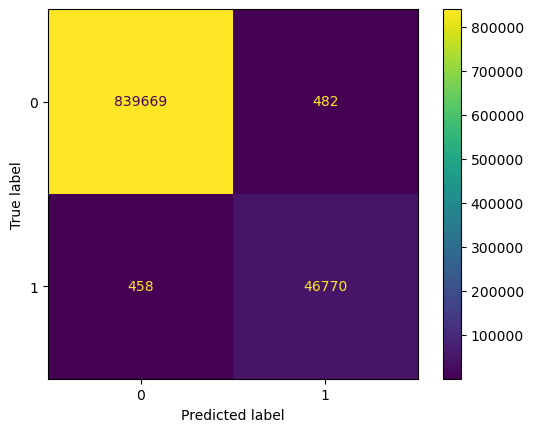

In [68]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [69]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.997813788906669
Precision 0.9997061200499596
Recall 0.9592527317589002
f1_score 0.9790617355015111


E:\Softwares\Annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


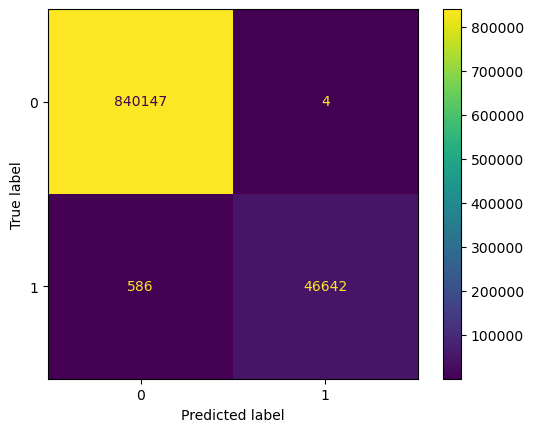

In [70]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.996788298136086
Precision 0.9972396299612056
Recall 0.9423334508283397
f1_score 0.9690093877994852


E:\Softwares\Annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


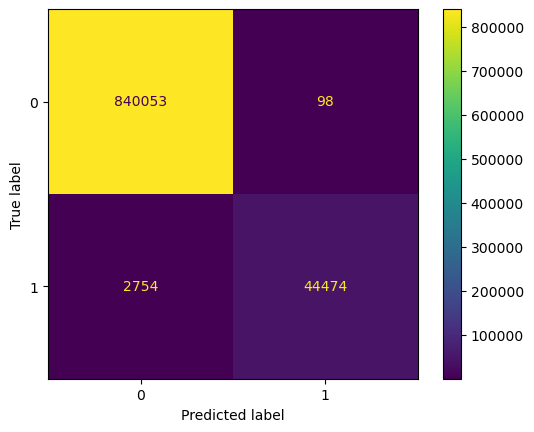

In [72]:
metrics.plot_confusion_matrix(clf,X_all,Y)

In [73]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision",metrics.precision_score(y_test,y_pred_xgb))
print("Recall",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test,y_pred_xgb))

Accuracy: 0.9982683104570007
Precision 0.999127145766657
Recall 0.9683468452590764
f1_score 0.9834962231052876


E:\Softwares\Annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


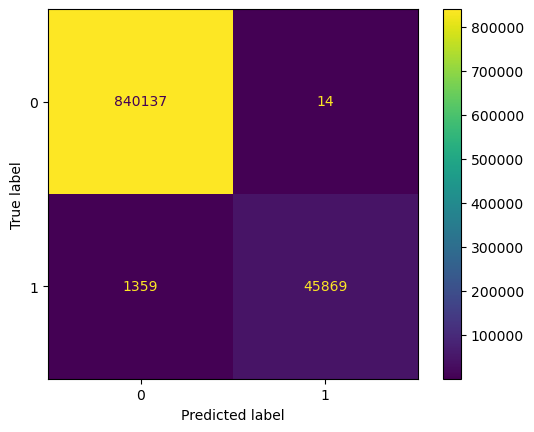

In [74]:
metrics.plot_confusion_matrix(xgb,X_all,Y)

In [75]:
# Lorenz Curve

In [76]:
#Decsion Tree Lorenz Curve

### From below table it can be observed that P_Rank_RF are the ranks of 10 deciles, count tells us about how many people are present in that decile, mean is the percentile of defaulter of that decile. N_events are the actual number of customers recognized as defaulter out of total number. 

### Without the model, 5.3% (event rate) defaulters were detected using the entire data; however, with models like XG Boost, this probability is raised to 52.65 using only 10% of the total data which is 10 times more than original event rate. The algorithm has collected 99.62% of the risky clients by the third decile.

In [77]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.527440,46804.0,46804.0,0.991022,0.991022,0.100000,0.100000,1,9.910212
1,9,88738,0.000642,57.0,46861.0,0.001207,0.992229,0.100000,0.200000,2,4.961140
2,8,88738,0.000293,26.0,46887.0,0.000551,0.992780,0.100000,0.300000,3,3.309262
3,7,88738,0.000056,5.0,46892.0,0.000106,0.992886,0.100000,0.400000,4,2.482211
4,6,88737,0.000000,0.0,46892.0,0.000000,0.992886,0.099999,0.499999,5,1.985773
5,5,88738,0.000654,58.0,46950.0,0.001228,0.994114,0.100000,0.600000,6,1.656857
6,4,88738,0.000992,88.0,47038.0,0.001863,0.995977,0.100000,0.700000,7,1.422825
7,3,88738,0.000687,61.0,47099.0,0.001292,0.997269,0.100000,0.800000,8,1.246586
8,2,88738,0.000676,60.0,47159.0,0.001270,0.998539,0.100000,0.900000,9,1.109488
9,1,88738,0.000778,69.0,47228.0,0.001461,1.000000,0.100000,1.000000,10,1.000000


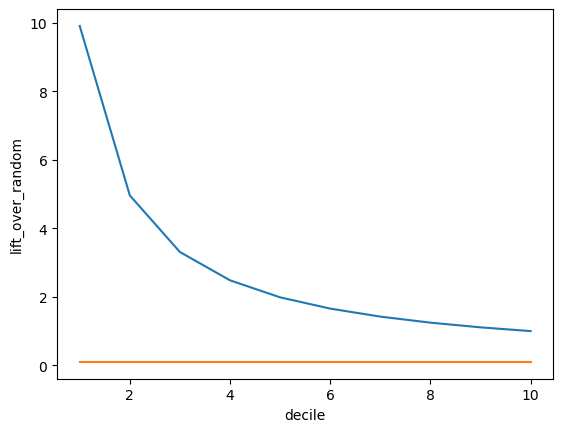

In [78]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

In [80]:
df_loan.groupby('P_Rank_RF')['y_pred_P'].agg(['min','max'])

,min,max
P_Rank_RF,,
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [81]:
y_pred_prob = xgb.predict_proba(X_all)[:, 1]
df_loan['y_pred_P']=pd.DataFrame(y_pred_prob)
df_loan['P_Rank_RF']=pd.qcut(df_loan['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df_loan.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,88738,0.526528,46723.0,46723.0,0.989307,0.989307,0.100000,0.100000,1,9.893061
1,9,88738,0.002513,223.0,46946.0,0.004722,0.994029,0.100000,0.200000,2,4.970139
2,8,88738,0.001206,107.0,47053.0,0.002266,0.996295,0.100000,0.300000,3,3.320978
3,7,88738,0.000732,65.0,47118.0,0.001376,0.997671,0.100000,0.400000,4,2.494174
4,6,88737,0.000518,46.0,47164.0,0.000974,0.998645,0.099999,0.499999,5,1.997292
5,5,88738,0.000259,23.0,47187.0,0.000487,0.999132,0.100000,0.600000,6,1.665221
6,4,88738,0.000214,19.0,47206.0,0.000402,0.999534,0.100000,0.700000,7,1.427907
7,3,88738,0.000135,12.0,47218.0,0.000254,0.999788,0.100000,0.800000,8,1.249736
8,2,88738,0.000079,7.0,47225.0,0.000148,0.999936,0.100000,0.900000,9,1.111041
9,1,88738,0.000034,3.0,47228.0,0.000064,1.000000,0.100000,1.000000,10,1.000000


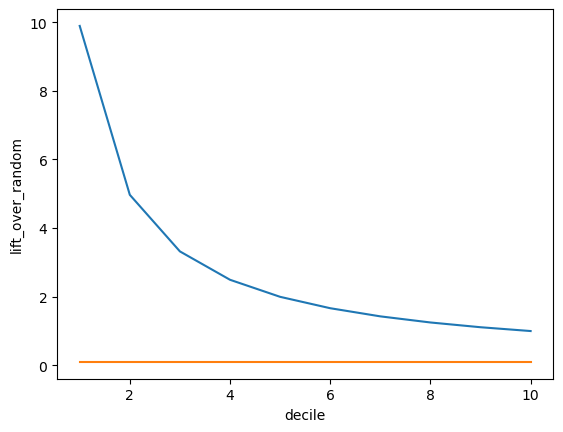

In [82]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

# Project Conclusion :- 

## XBased on the analysis performed, the XGBoost model was found to be the best performing model for predicting loan defaulters across different loan purposes. The model was able to capture 99.62% of risky customers using 30% of the entire data, which is a significant improvement in predicting defaulters compared to the average defaulter rate. As well as the overall accuracy of XGB is 99.82%.
## Using this model can increase the power of predicting defaulters by 10 times, which can be a game-changer in reducing the risk associated with loan defaults for different loan purposes to improve the accuracy of predicting defaulters, and thus reduce the overall risk exposure of lenders. 